In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Observation
1.Above is our dataset which contains 614 rows and 13 columns.This decribes details of a loan applicant and we have to predict whether his loan will be passed or not.

2.So now we have target variable as Loan_status column and it is categorical variable so this is our binary classification problem.

In [3]:
#let's check value counts for each column
for col in df:
    print('Value count of ',[col] ,df[col].value_counts())
    /n:

Value count of  ['Loan_ID'] LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Value count of  ['Gender'] Male      489
Female    112
Name: Gender, dtype: int64
Value count of  ['Married'] Yes    398
No     213
Name: Married, dtype: int64
Value count of  ['Dependents'] 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Value count of  ['Education'] Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Value count of  ['Self_Employed'] No     500
Yes     82
Name: Self_Employed, dtype: int64
Value count of  ['ApplicantIncome'] 2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
Value count of  ['CoapplicantIncome'] 0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# observation
1.There are nulls in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,credit_history columns

2.Gender,Married,Dependents,Education,Self_Employed,Property_Area have dtype as object and are categorical columns.

3.ApplicantIncome have dtype as int and is having Discrete Data.

4.CoapplicantIncome,LoanAmount are having dtype as float and have cont data

5.loan_Amount_Term and Credit_History have dtype as float but are cat variable

6.Loan_ID column have all unique values and i don't think it will impact our target column so we can drop it off

In [5]:
#let's drop id column
df.drop('Loan_ID',axis=1,inplace=True)
df.shape

(614, 12)

In [6]:
#let's drop duplicates also
df.drop_duplicates()
df.shape

(614, 12)

In [7]:
#let's fill null values
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])


In [8]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Observation
1.Mean is greater than median in applicantincome ,coapplicantincome and loanamount ,it means data might be right skewed and have outliers as well.

2.We can observe other statistics as well.

Let's check with graphs.

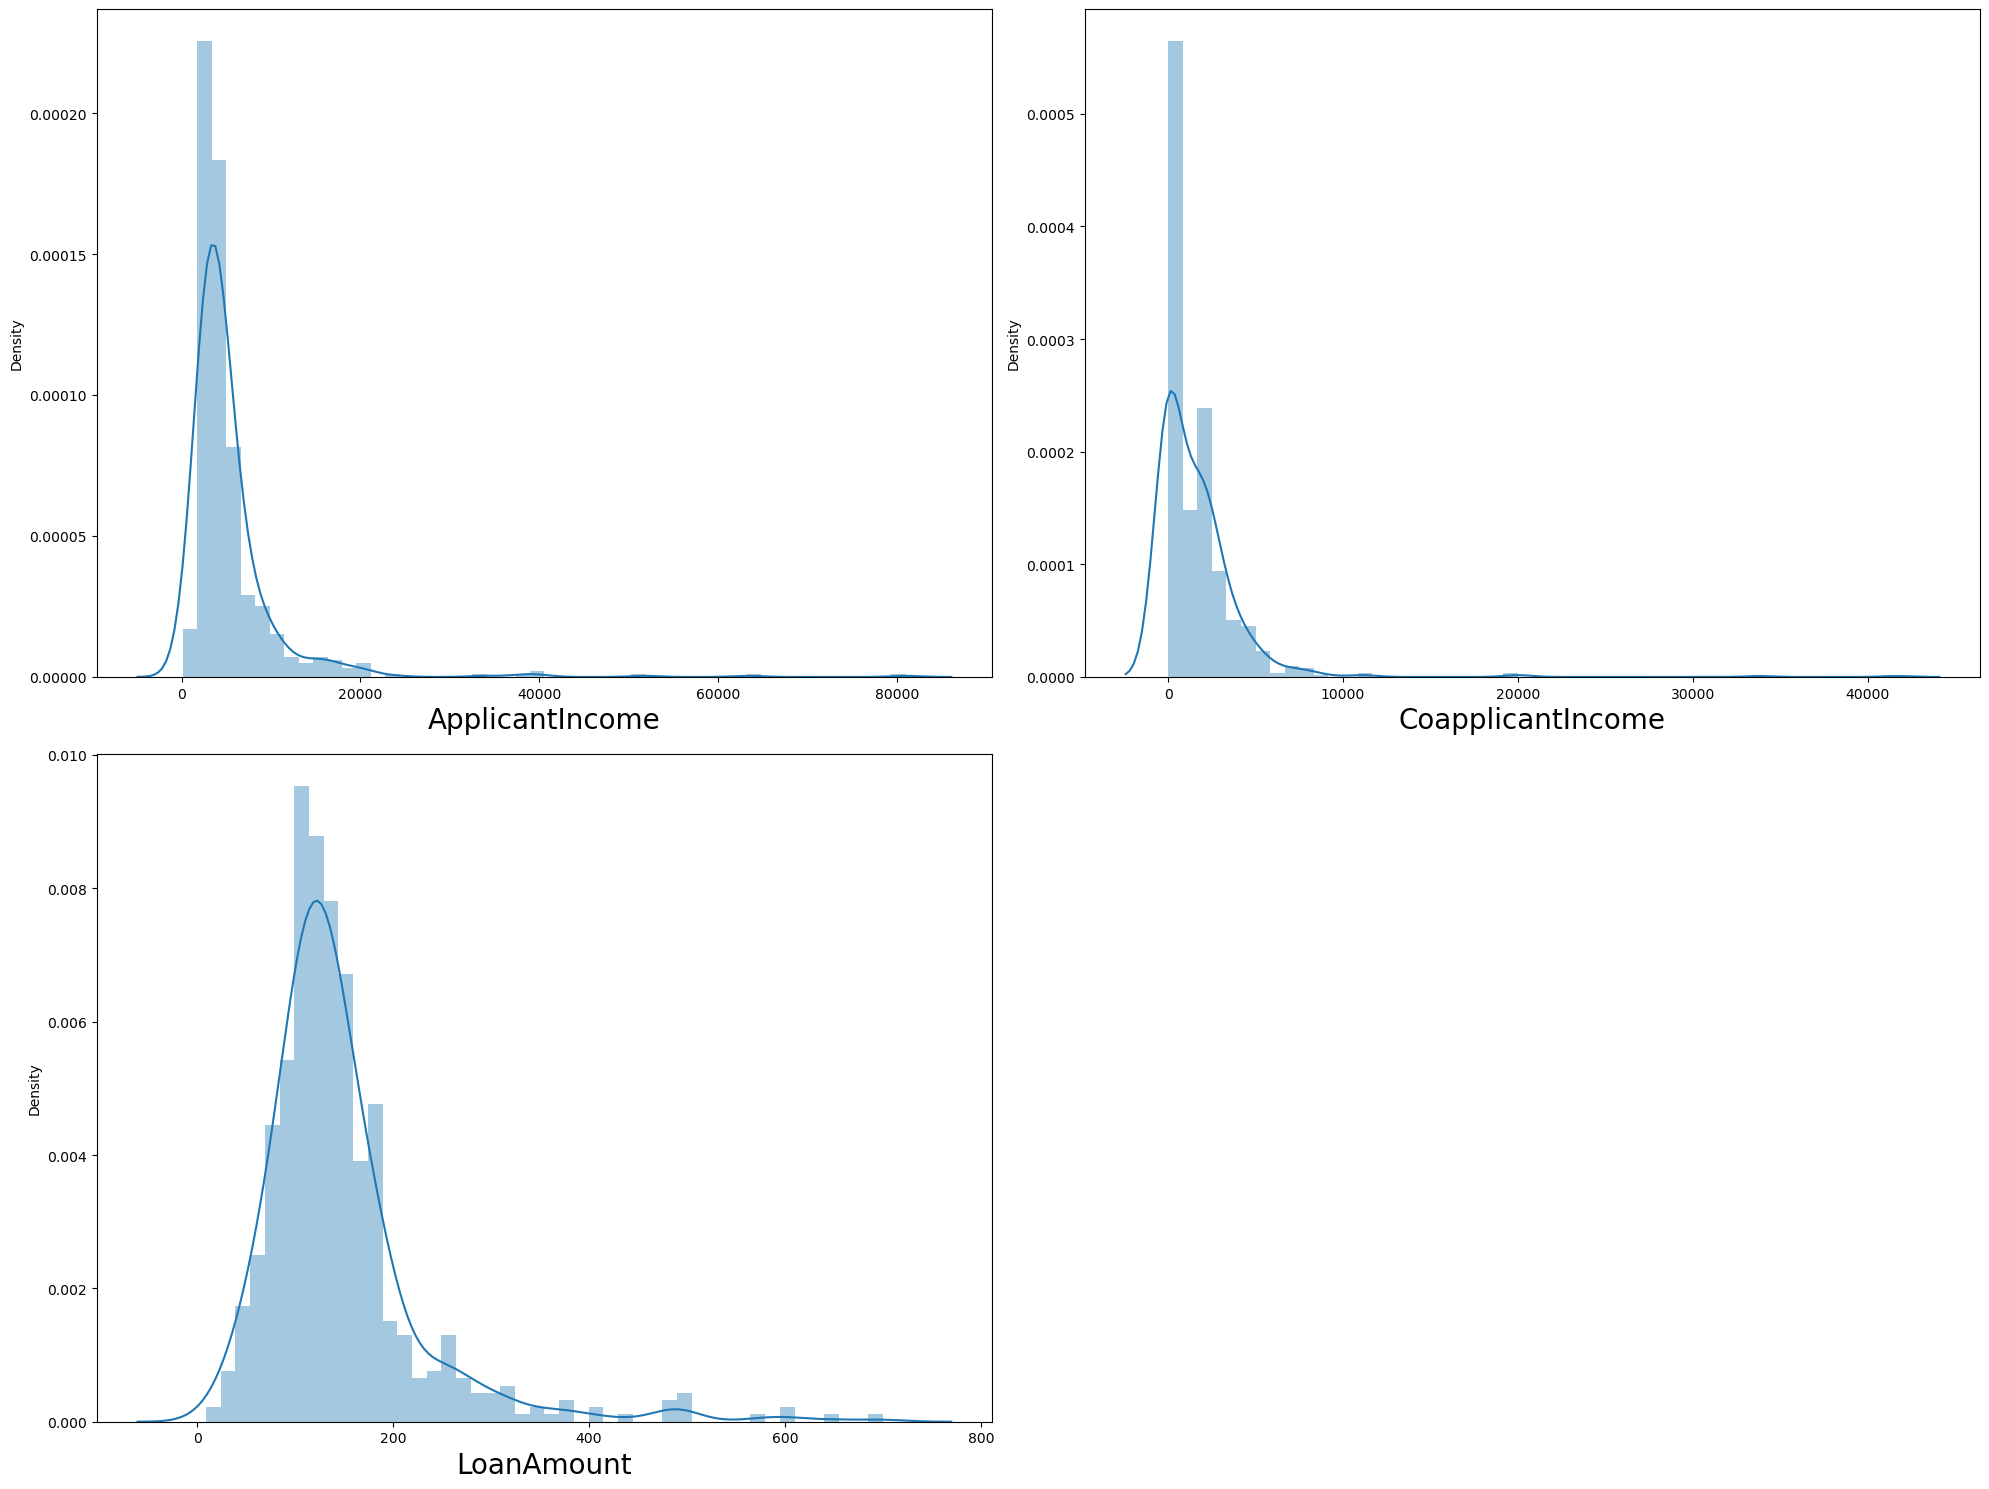

In [11]:
#Let's check data distribution for each column

plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
Distribution seems good but is right skewed and have outliers also

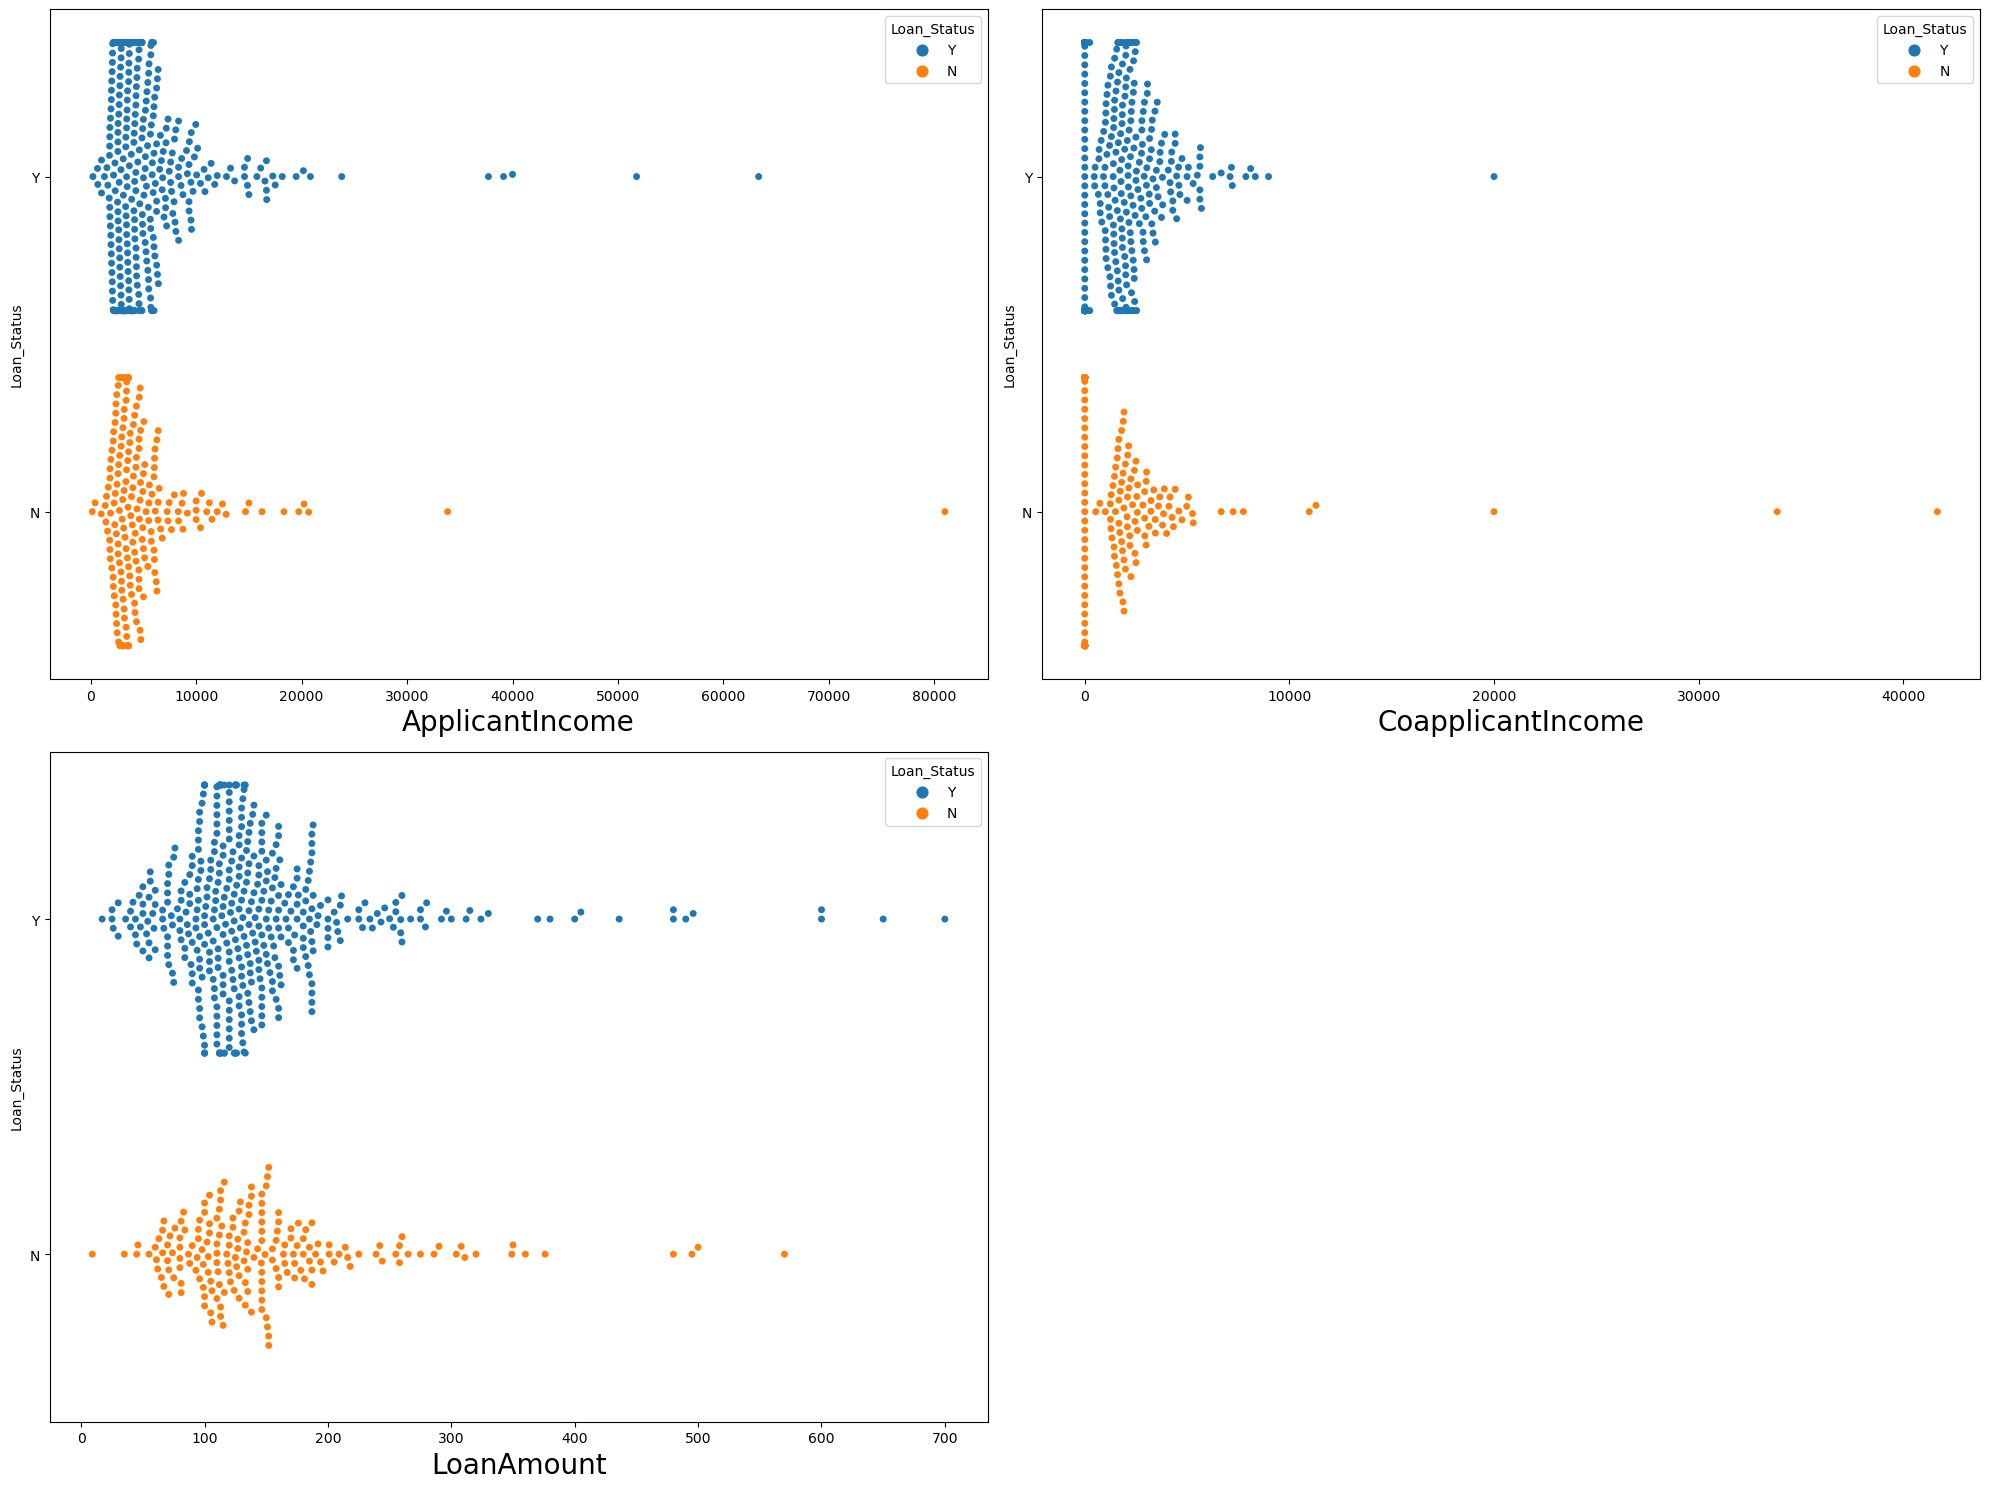

In [12]:
#Let's check relation between label and features for each column

plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        sns.swarmplot(x=df[col],y=df['Loan_Status'],data=df,hue='Loan_Status')
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
1.From here we can observe relation between our cont features and label.

2.As the loan amount and applicant,coapplicant income increases there is high chance of loan getting approved 

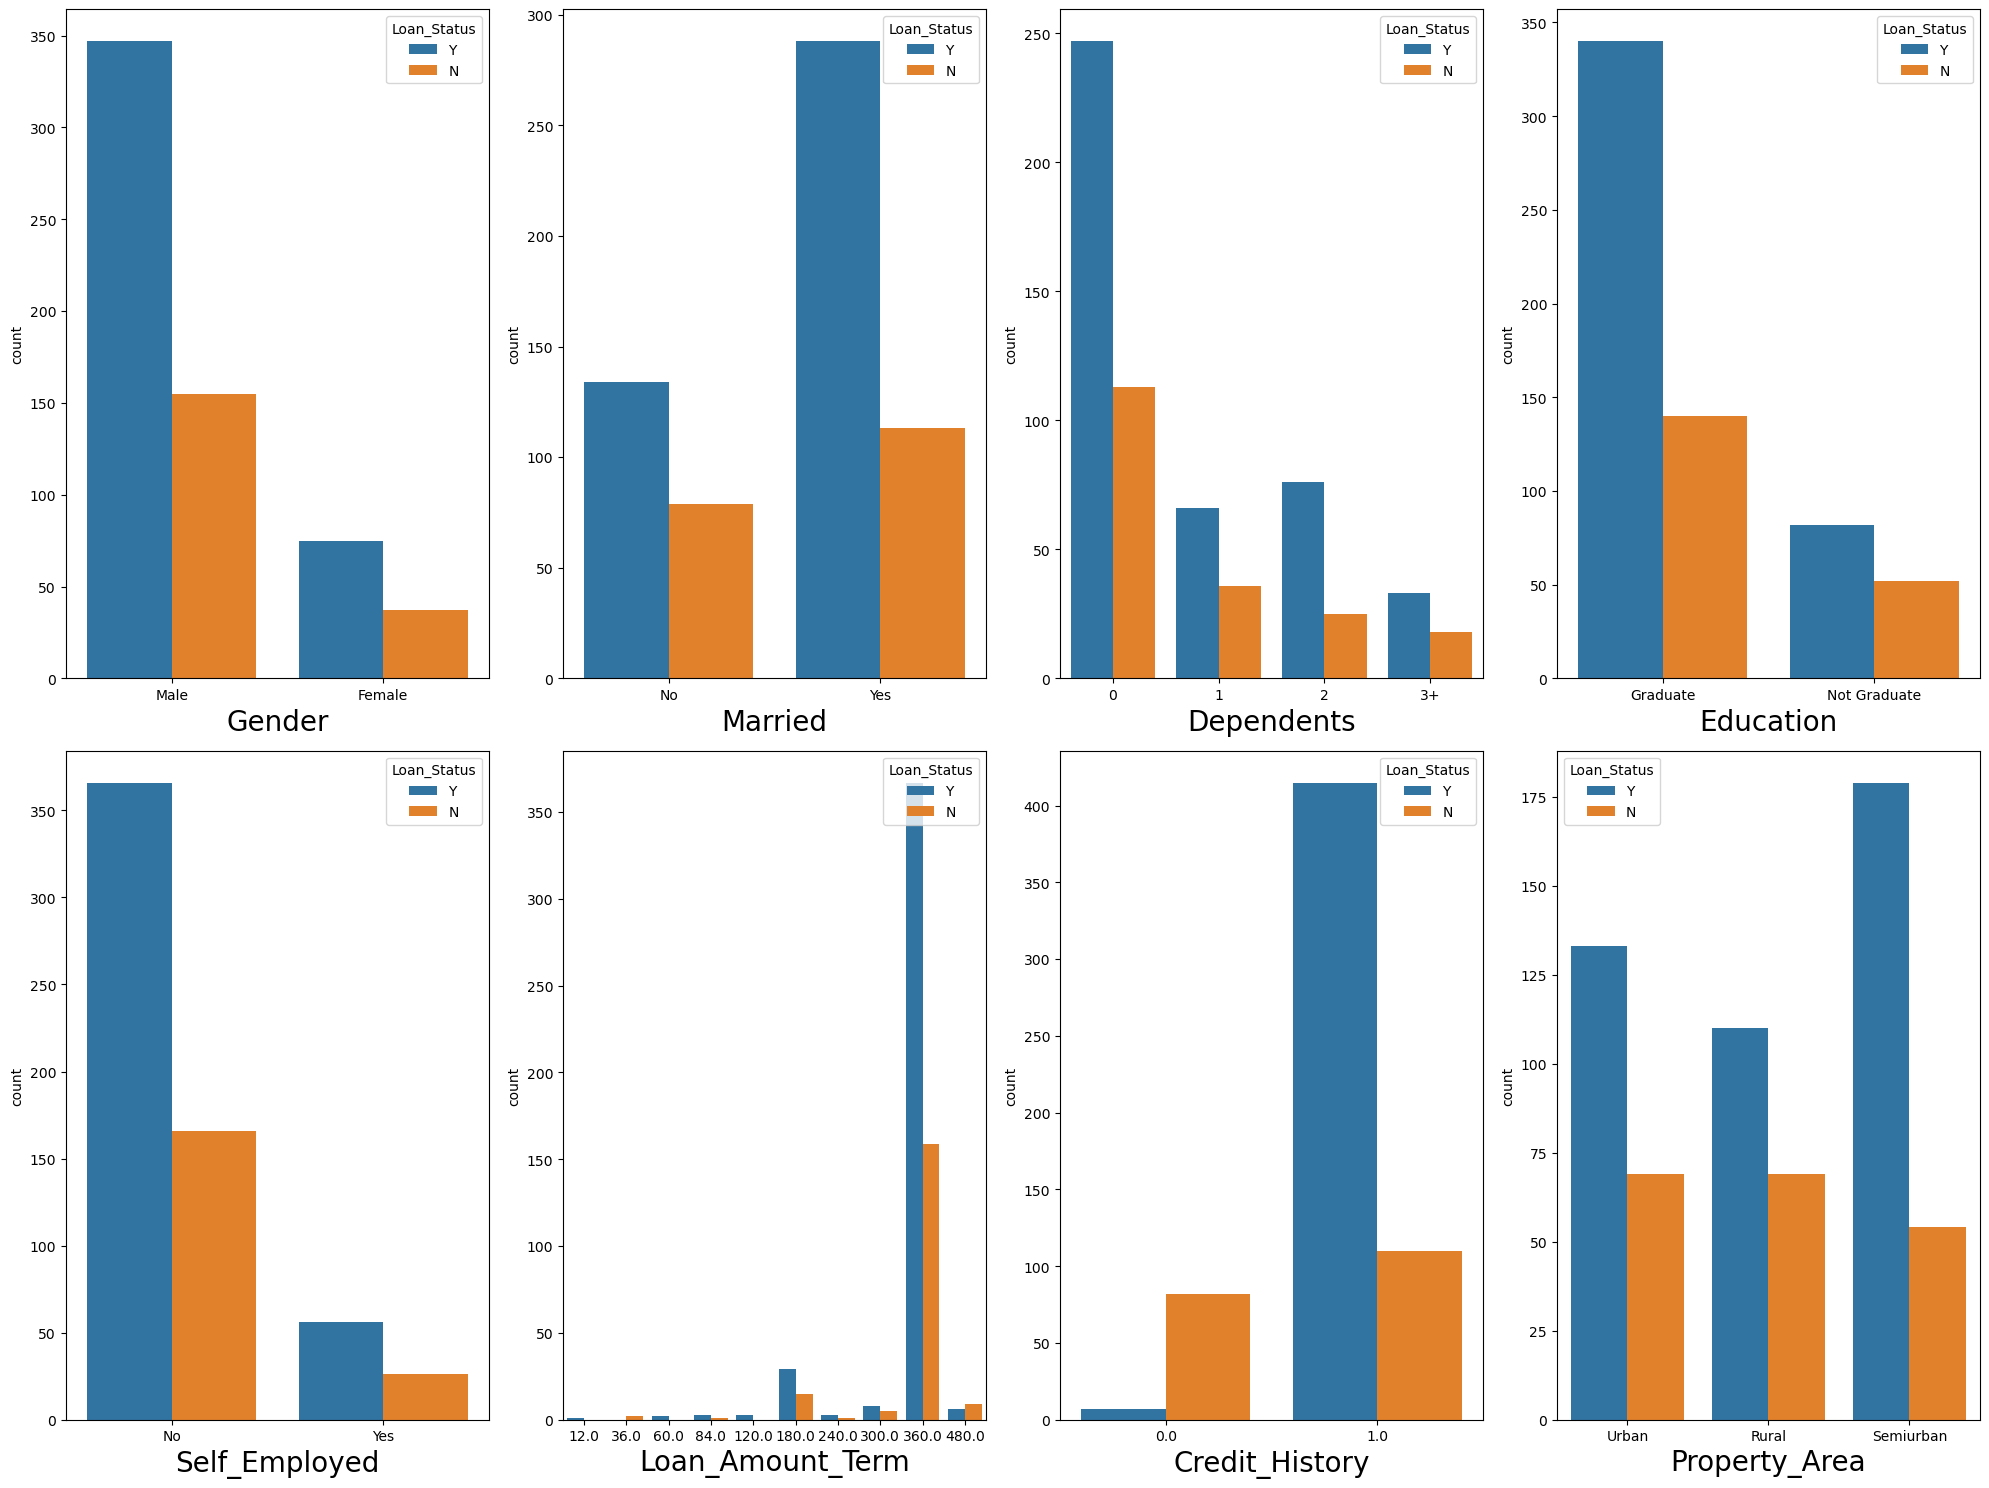

In [13]:
#Let's check count plot for cat variables 

plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']]:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.countplot(x=df[col],data=df,hue='Loan_Status')
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
From above plot we can visualize relation between features and labels 
1.Like for gender male loan is getting approved more,same for education i.e if he is graduated his loan will get approved fast

we can visualize other relation as well

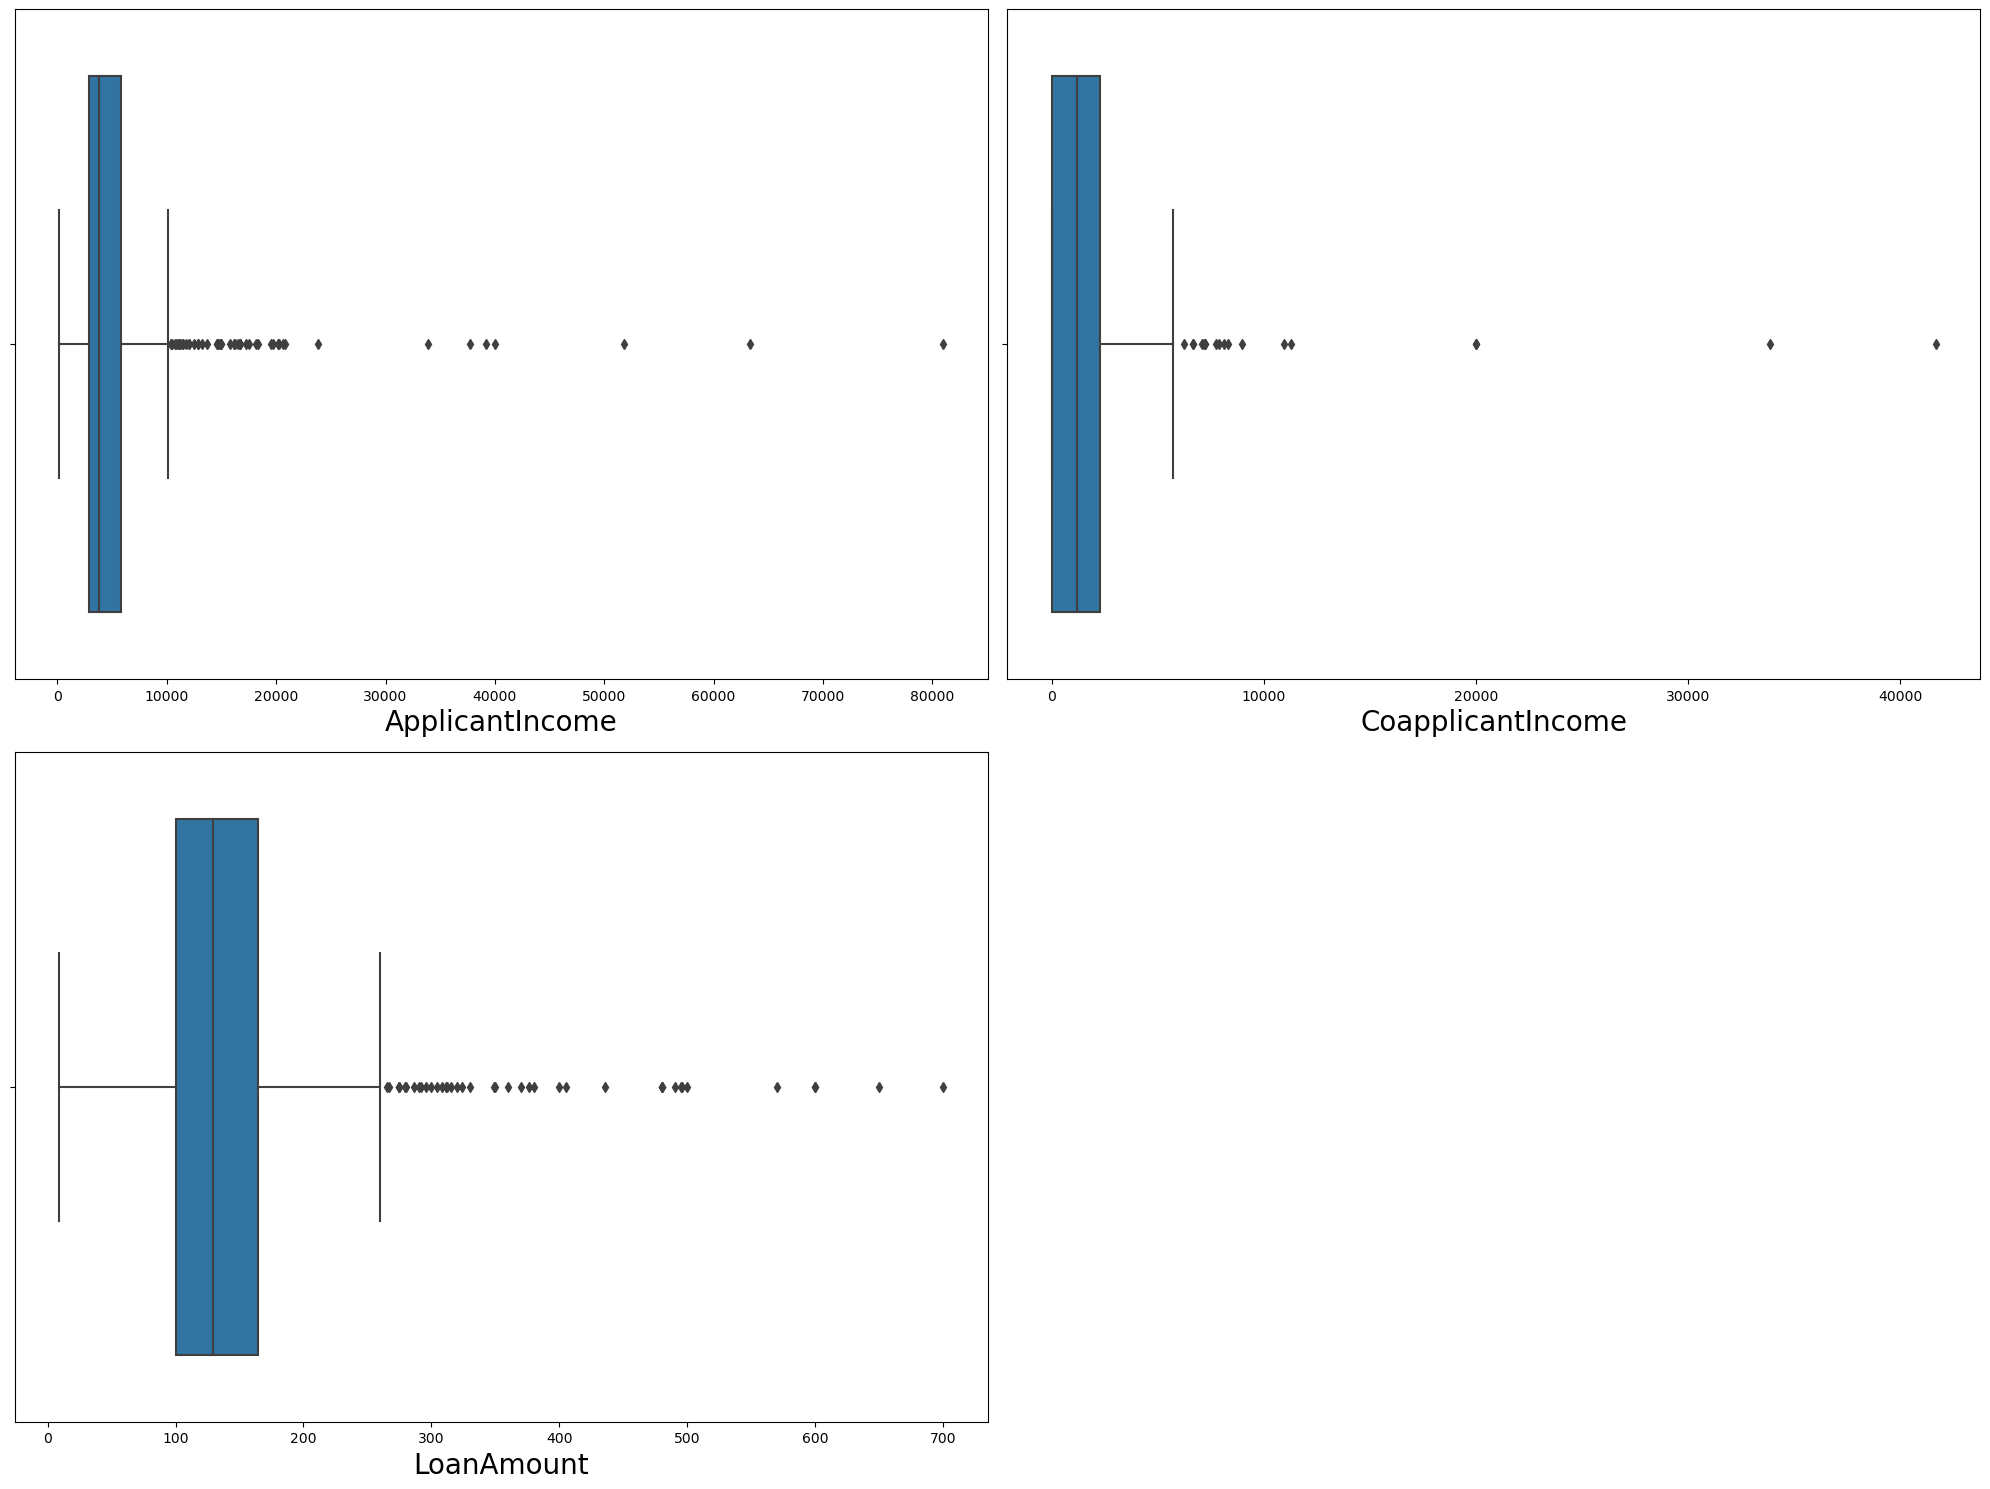

In [14]:
#Let's check outliers for each column

plt.figure(figsize=(20,15))
plotnumber = 1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
There are outliers in all 3 columns let's remove them using zscore method

In [15]:
from scipy.stats import zscore

In [16]:
col=df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
z_score=np.abs(zscore(col))
np.where(z_score>3)

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
        333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
        581, 600, 604], dtype=int64),
 array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
        2, 2, 2, 2, 1, 1, 2], dtype=int64))

In [17]:
data=df[(z_score<3).all(axis=1)]
data.shape

(589, 12)

In [18]:
#let's check for dataloss
print('Data loss is :',((df.shape[0]-data.shape[0])/df.shape[0])*100)

Data loss is : 4.071661237785016


# Observation
Here our data loss is fine.

Now let's check for skewness

In [19]:
data.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

In [20]:
#copying data in other variable so our original data is not changed
data1=data.copy()


In [21]:
data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [22]:
#lets use cube root method
data['ApplicantIncome']=np.cbrt(data['ApplicantIncome'])
data['CoapplicantIncome']=np.cbrt(data['CoapplicantIncome'])
data['LoanAmount']=np.cbrt(data['LoanAmount'])

In [23]:
data.skew()

ApplicantIncome      0.848471
CoapplicantIncome   -0.030379
LoanAmount          -0.098485
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

# Observation
Skewness have reduced in all 3 columns but let's try another method to keep skewness in range

In [24]:
df2=data1.copy()#keeping data in another variable
df2.shape

(589, 12)

In [25]:
#lets use cube root method and log transform
data1['ApplicantIncome']=np.log(data1['ApplicantIncome'])
data1['CoapplicantIncome']=np.cbrt(data1['CoapplicantIncome'])
data1['LoanAmount']=np.cbrt(data1['LoanAmount'])

In [26]:
data1.skew()

ApplicantIncome     -0.207659
CoapplicantIncome   -0.030379
LoanAmount          -0.098485
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

# Observation
Now our skewness is in our ideal range which should be between -0.5 to 0.5

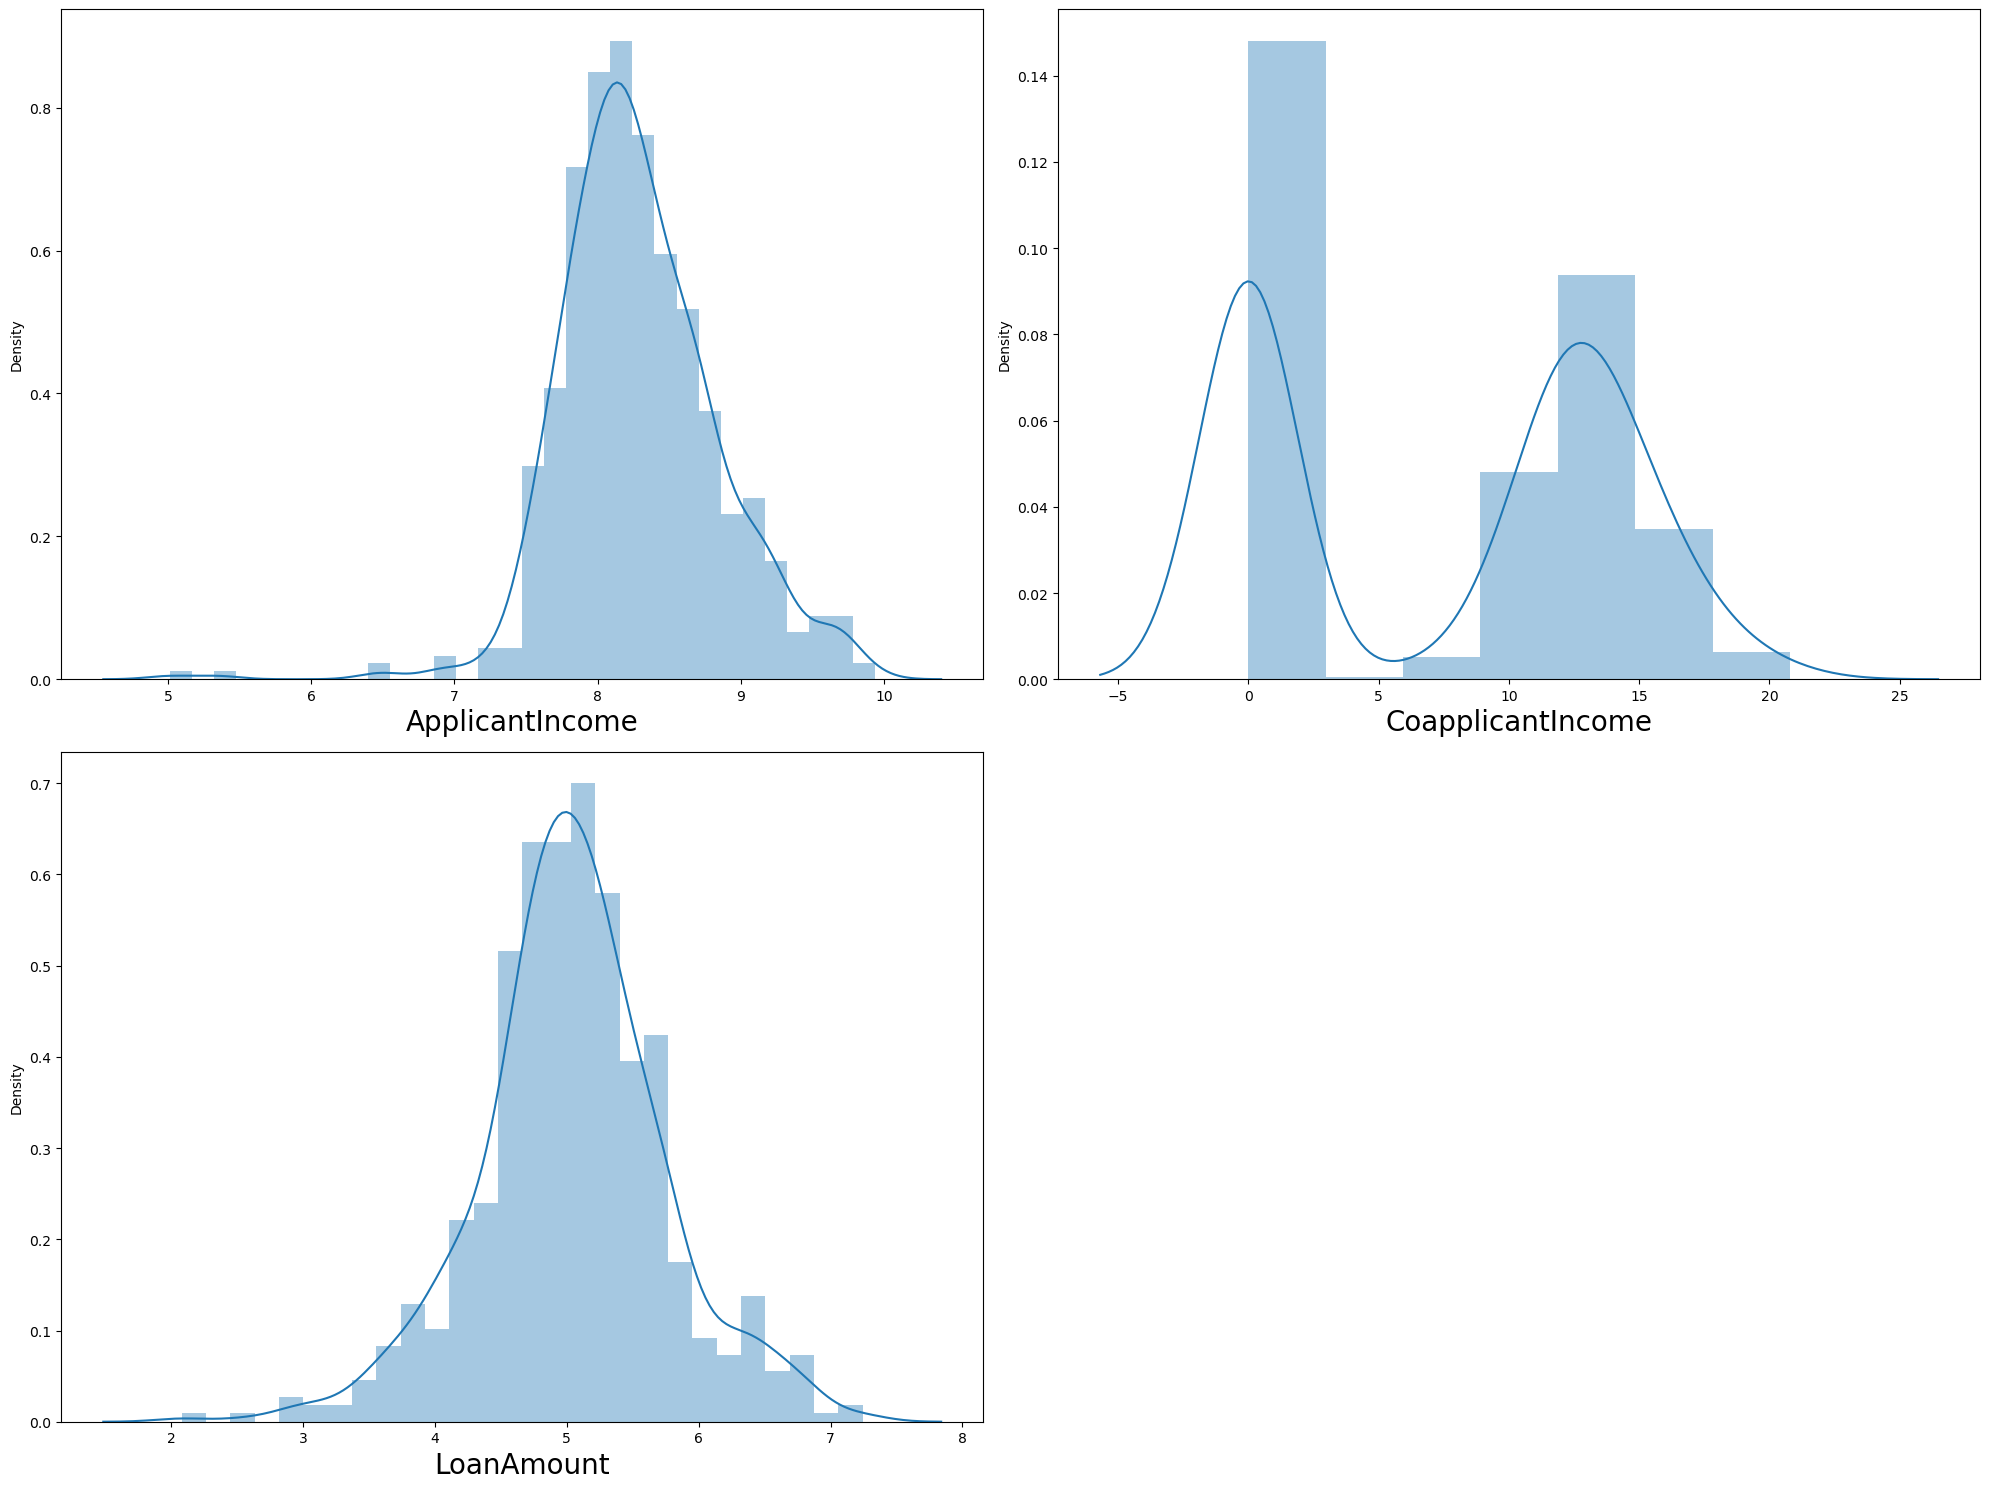

In [27]:
#Let's check data distribution for each column

plt.figure(figsize=(20,15))
plotnumber = 1
for col in data1[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data1[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

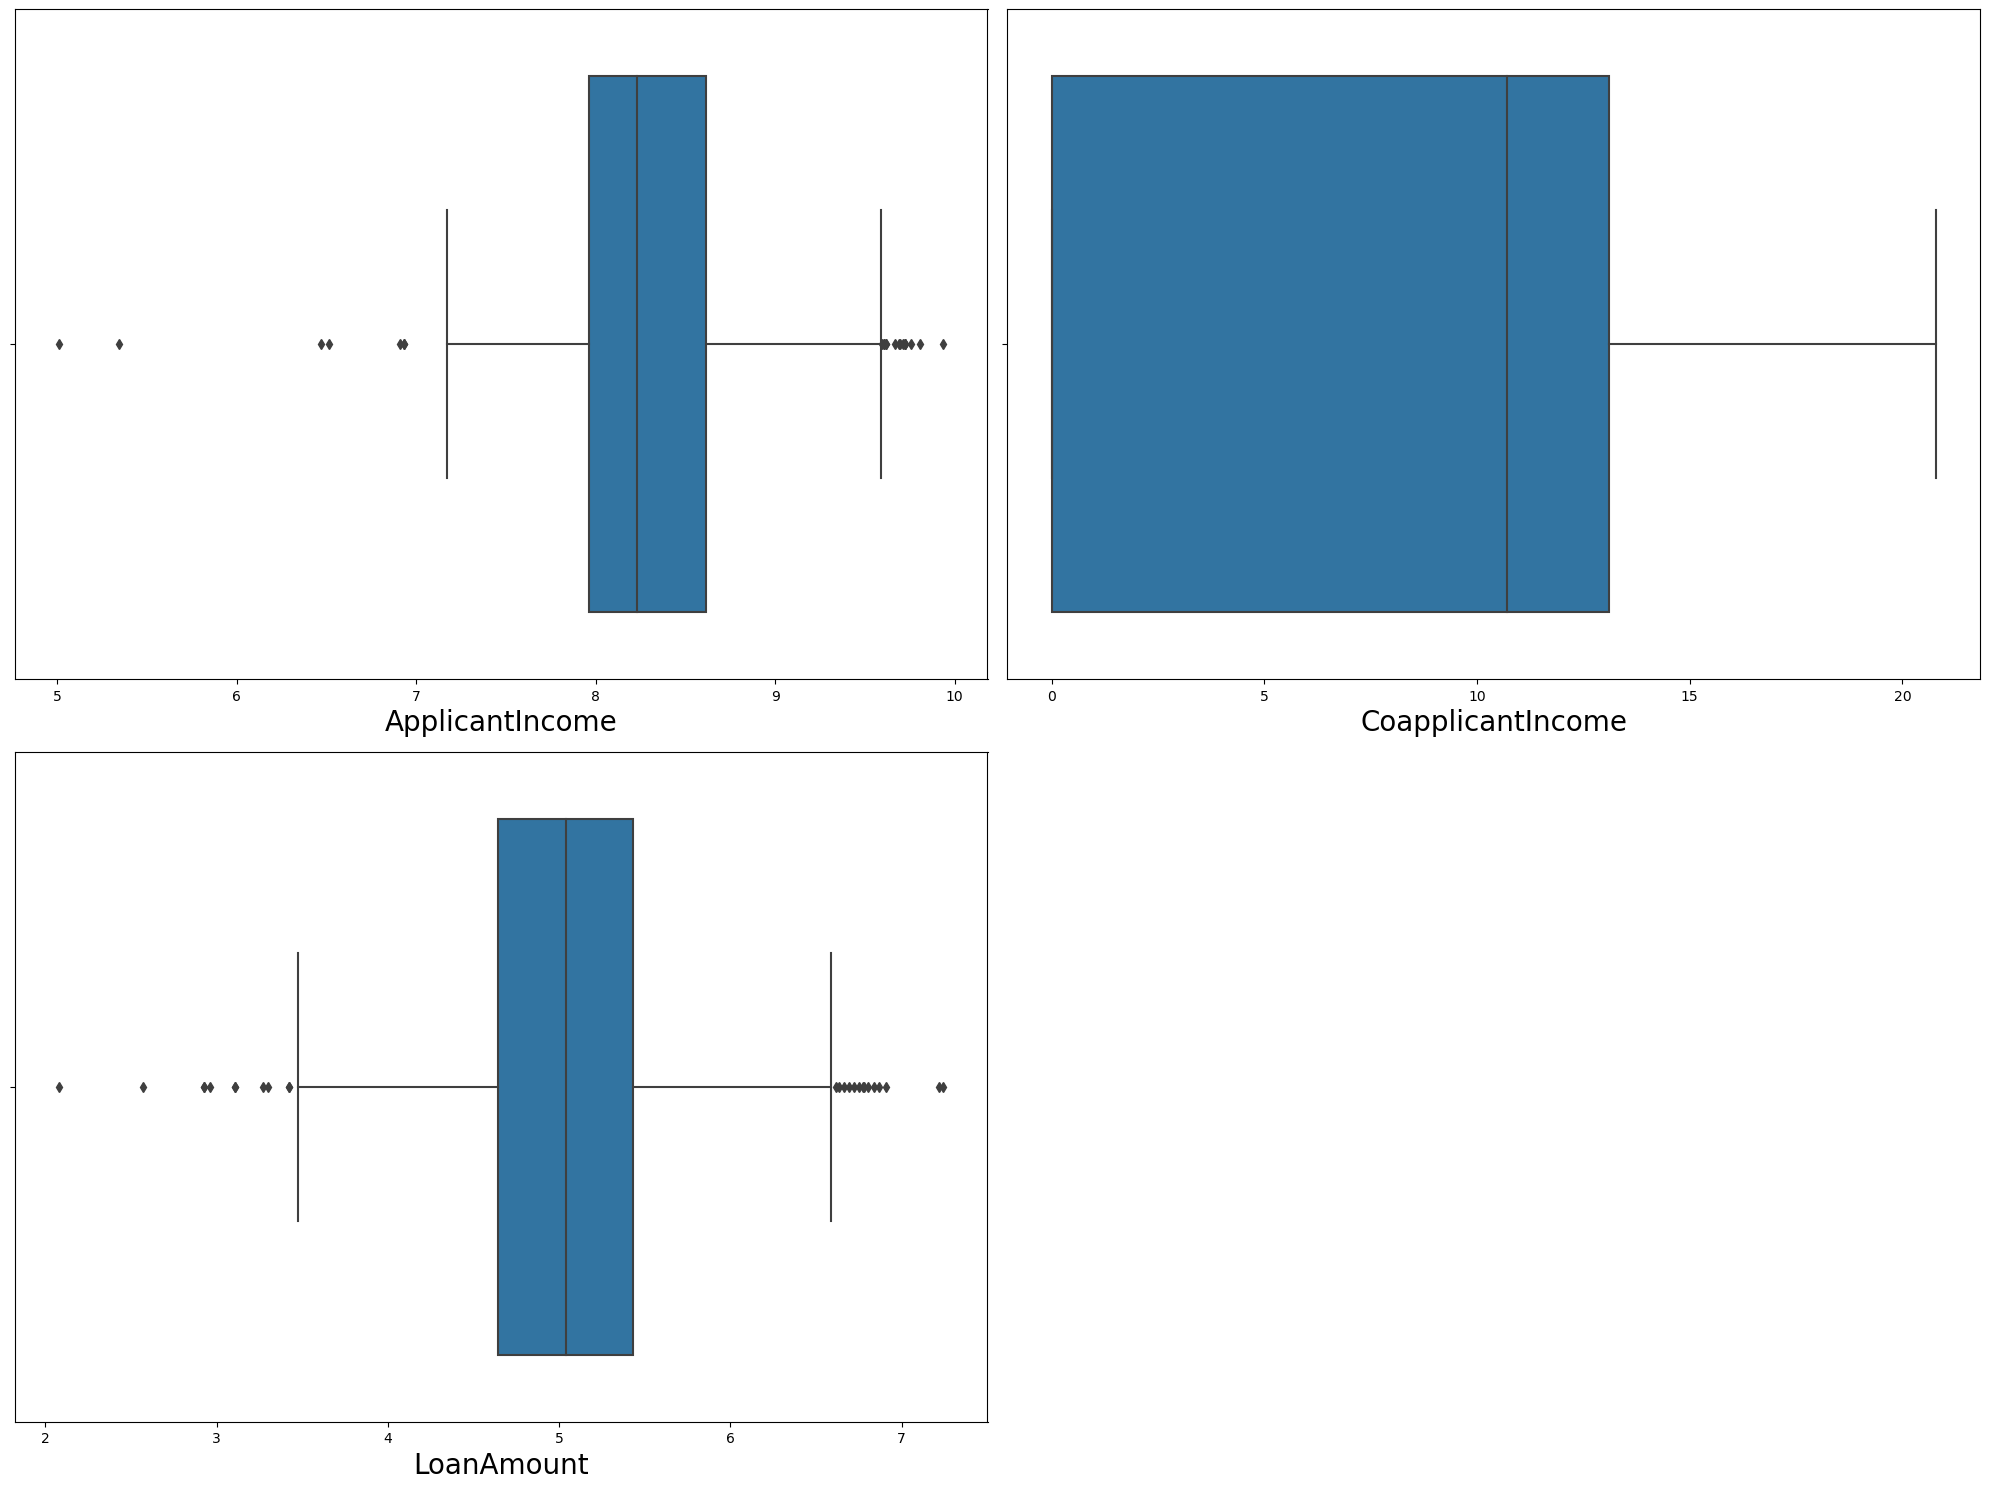

In [28]:
#Let's check outliers for each column

plt.figure(figsize=(20,15))
plotnumber = 1
for col in data1[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnumber<=3:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(data1[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [29]:
#lets encode categorical features using label encoder
from sklearn.preprocessing import LabelEncoder 

In [30]:
for col in data1.columns:
    if data1[col].dtype == object:
        label = LabelEncoder()
        data1[col] = label.fit_transform(data1[col])

In [31]:
#now let's check for corelation
coeff=data1.corr()
coeff

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.000841,0.060136,0.227755,0.158982,-0.084919,0.013432,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.004453,-0.024120,0.317668,0.174194,-0.100776,0.019377,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.055481,0.105754,-0.010943,0.127294,-0.091158,-0.017650,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.003507,-0.167415,0.018375,-0.128459,-0.076546,-0.073799,-0.065623,-0.092852
Self_Employed,0.000841,-0.004453,0.055481,-0.003507,1.000000,0.211160,-0.091531,0.104346,-0.053868,-0.012954,-0.030248,-0.016617
ApplicantIncome,0.060136,-0.024120,0.105754,-0.167415,0.211160,1.000000,-0.342798,0.429323,-0.042909,0.025665,-0.015572,-0.002653
CoapplicantIncome,0.227755,0.317668,-0.010943,0.018375,-0.091531,-0.342798,1.000000,0.230519,0.003924,0.000178,-0.075864,0.072285
LoanAmount,0.158982,0.174194,0.127294,-0.128459,0.104346,0.429323,0.230519,1.000000,0.095624,-0.011518,-0.100821,-0.039400
Loan_Amount_Term,-0.084919,-0.100776,-0.091158,-0.076546,-0.053868,-0.042909,0.003924,0.095624,1.000000,-0.013960,-0.070405,-0.023119
Credit_History,0.013432,0.019377,-0.017650,-0.073799,-0.012954,0.025665,0.000178,-0.011518,-0.013960,1.000000,-0.005694,0.555908


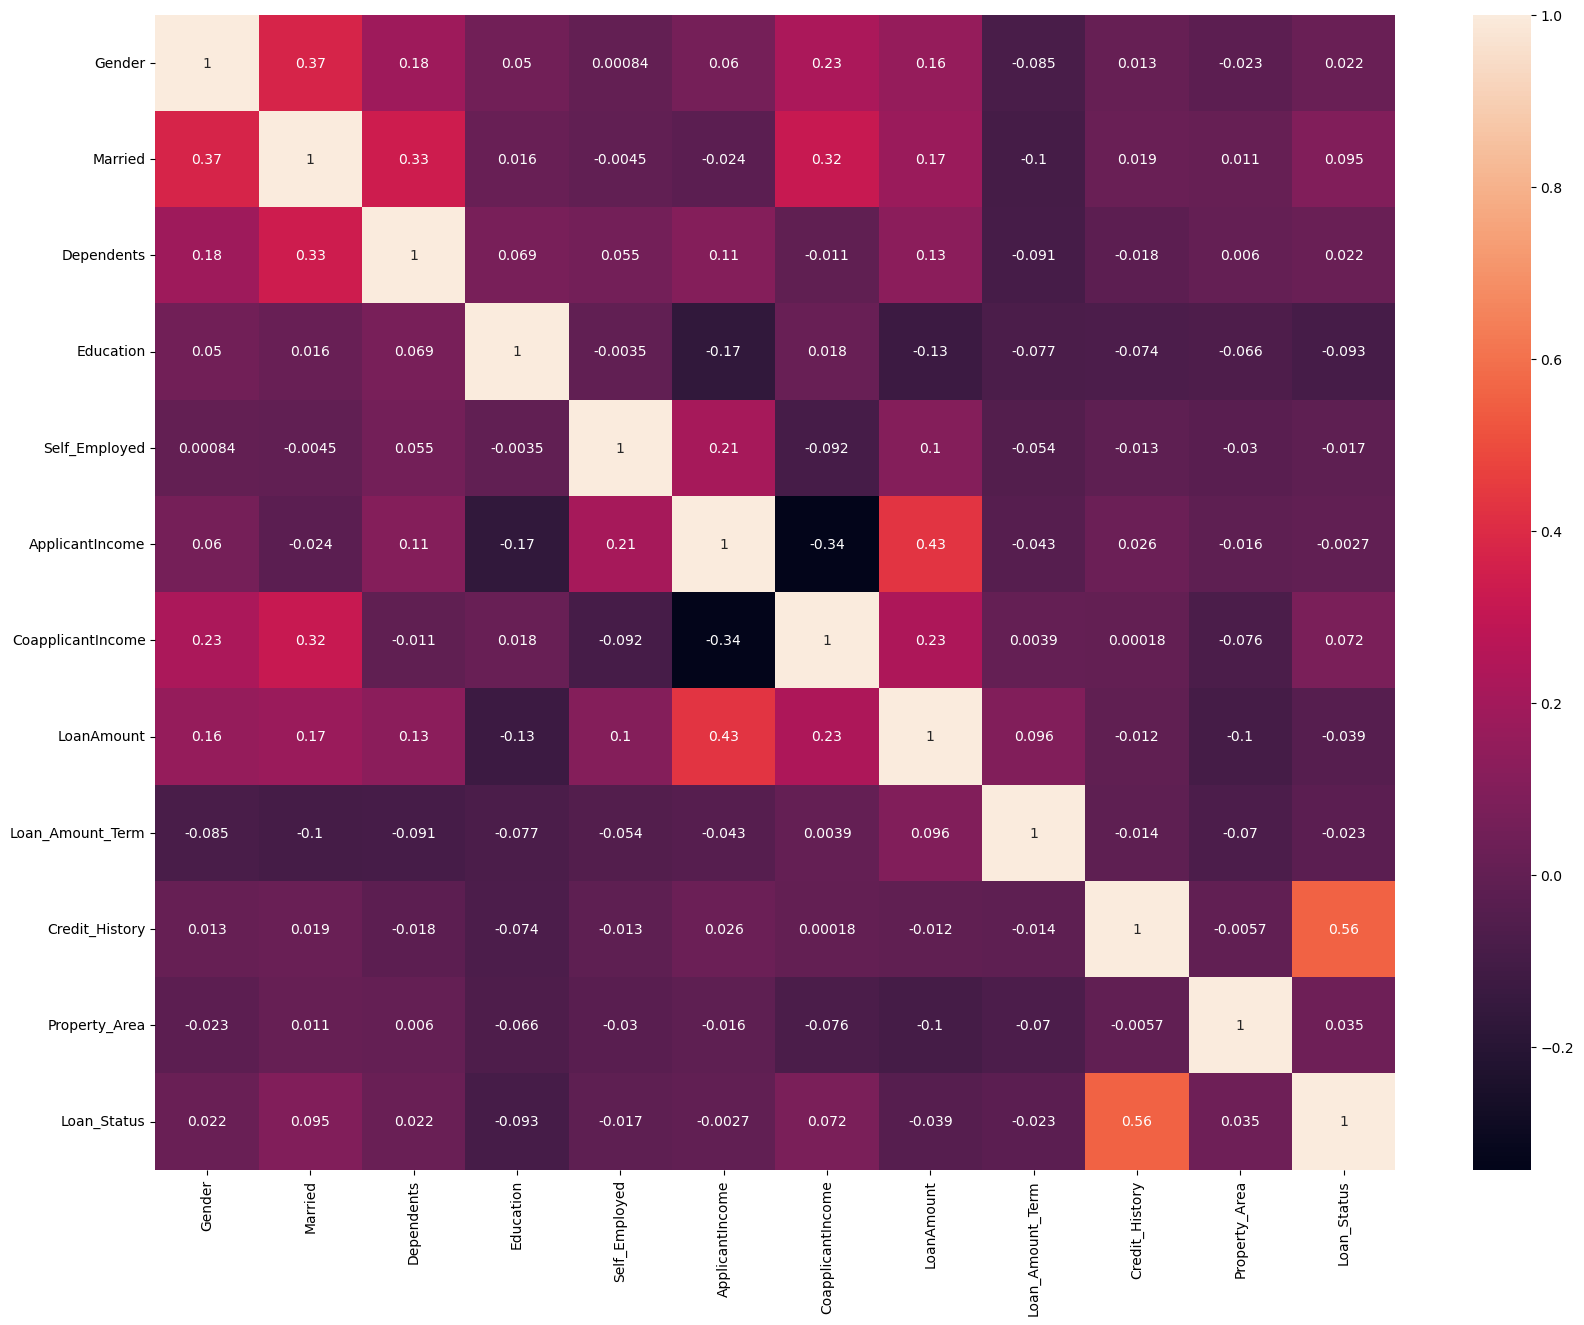

In [32]:
#let's check heatmap
plt.figure(figsize=(20,15))
sns.heatmap(coeff,annot=True)
plt.show()

# Observation
1.gender,Married,Dependents,coapplicantincome,credithistory,propertyarea are in positive relation with our label

2.education,selfemployed,applicantincome,loanamount,loanamountterm are in negative relation with our label.

3.credit history is in high relation with our label.

4.ApplicantIncome is in very less relation with our label

In [33]:
data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,5.270588,360.0,1.0,2,1
1,1,1,1,0,0,8.430109,11.467457,5.039684,360.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.000000,4.041240,360.0,1.0,2,1
3,1,1,0,1,0,7.856707,13.310098,4.932424,360.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,5.204828,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,0.000000,4.140818,360.0,1.0,0,1
610,1,1,3,0,0,8.320205,0.000000,3.419952,180.0,1.0,0,1
611,1,1,1,0,0,8.996157,6.214465,6.324704,360.0,1.0,2,1
612,1,1,2,0,0,8.933664,0.000000,5.718479,360.0,1.0,2,1


In [34]:
#let's separate features and label
X=data1.drop(columns=['Loan_Status'],axis=1)
y=data1['Loan_Status']

In [35]:
X.shape

(589, 11)

In [36]:
#Let's standarize our data
from sklearn.preprocessing import StandardScaler

In [37]:
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.695813,-1.089890,0.329488,0.272306,0.413490,1.222929
1,0.476533,0.733389,0.276349,-0.542684,-0.384900,0.254072,0.600453,0.004193,0.272306,0.413490,-1.313356
2,0.476533,0.733389,-0.728402,-0.542684,2.598076,-0.513338,-1.089890,-1.402404,0.272306,0.413490,1.222929
3,0.476533,0.733389,-0.728402,1.842694,-0.384900,-0.784378,0.872065,-0.146914,0.272306,0.413490,1.222929
4,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.741974,-1.089890,0.236846,0.272306,0.413490,1.222929
...,...,...,...,...,...,...,...,...,...,...,...
584,-2.098492,-1.363533,-0.728402,-0.542684,-0.384900,-0.574735,-1.089890,-1.262120,0.272306,0.413490,-1.313356
585,0.476533,0.733389,2.285851,-0.542684,-0.384900,0.055031,-1.089890,-2.277669,-2.525162,0.413490,-1.313356
586,0.476533,0.733389,0.276349,-0.542684,-0.384900,1.279202,-0.173856,1.814515,0.272306,0.413490,1.222929
587,0.476533,0.733389,1.281100,-0.542684,-0.384900,1.166027,-1.089890,0.960472,0.272306,0.413490,1.222929


In [38]:
#checking multicollinerity problem using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range (X.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,1.216298,Gender
1,1.396975,Married
2,1.178186,Dependents
3,1.065216,Education
4,1.053750,Self_Employed
5,1.747223,ApplicantIncome
6,1.592522,CoapplicantIncome
7,1.599241,LoanAmount
8,1.056953,Loan_Amount_Term
9,1.008680,Credit_History


# Observation
Vif factor is in our ideal range and all features are important so i m keeping them all and not using feature selection technique.

We can proceed ahead for model building

In [40]:
y.value_counts()

1    407
0    182
Name: Loan_Status, dtype: int64

# Observation
Here ratio of classes is 69:31,so i m considering it as a balanced dataset.So no need of balancing classes

we can proceed ahead for modelling.

# Modelling

In [41]:
#creating training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=121)

In [42]:
#import lib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [43]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("=======Train Result======")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n===Test Result====")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [44]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [45]:
metric_score(log,x_train,x_test,y_train,y_test,train=True)
metric_score(log,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.31%

===Test Result====
Accuracy Score:79.05%


Test Classification Report
               precision    recall  f1-score   support

           0       0.82      0.40      0.54        45
           1       0.79      0.96      0.86       103

    accuracy                           0.79       148
   macro avg       0.80      0.68      0.70       148
weighted avg       0.80      0.79      0.77       148



In [46]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.09%

===Test Result====
Accuracy Score:76.35%


Test Classification Report
               precision    recall  f1-score   support

           0       0.69      0.40      0.51        45
           1       0.78      0.92      0.84       103

    accuracy                           0.76       148
   macro avg       0.74      0.66      0.68       148
weighted avg       0.75      0.76      0.74       148



In [48]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
metric_score(tree,x_train,x_test,y_train,y_test,train=True)
metric_score(tree,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:77.70%


Test Classification Report
               precision    recall  f1-score   support

           0       0.63      0.64      0.64        45
           1       0.84      0.83      0.84       103

    accuracy                           0.78       148
   macro avg       0.74      0.74      0.74       148
weighted avg       0.78      0.78      0.78       148



In [50]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [51]:
metric_score(bag,x_train,x_test,y_train,y_test,train=True)
metric_score(bag,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:97.96%

===Test Result====
Accuracy Score:75.68%


Test Classification Report
               precision    recall  f1-score   support

           0       0.61      0.56      0.58        45
           1       0.81      0.84      0.83       103

    accuracy                           0.76       148
   macro avg       0.71      0.70      0.70       148
weighted avg       0.75      0.76      0.75       148



In [52]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
metric_score(rand,x_train,x_test,y_train,y_test,train=True)
metric_score(rand,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:77.70%


Test Classification Report
               precision    recall  f1-score   support

           0       0.71      0.44      0.55        45
           1       0.79      0.92      0.85       103

    accuracy                           0.78       148
   macro avg       0.75      0.68      0.70       148
weighted avg       0.77      0.78      0.76       148



In [54]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [55]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:83.90%

===Test Result====
Accuracy Score:76.35%


Test Classification Report
               precision    recall  f1-score   support

           0       0.69      0.40      0.51        45
           1       0.78      0.92      0.84       103

    accuracy                           0.76       148
   macro avg       0.74      0.66      0.68       148
weighted avg       0.75      0.76      0.74       148



In [56]:
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [57]:
metric_score(grad,x_train,x_test,y_train,y_test,train=True)
metric_score(grad,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:91.38%

===Test Result====
Accuracy Score:76.35%


Test Classification Report
               precision    recall  f1-score   support

           0       0.68      0.42      0.52        45
           1       0.78      0.91      0.84       103

    accuracy                           0.76       148
   macro avg       0.73      0.67      0.68       148
weighted avg       0.75      0.76      0.74       148



In [58]:
support=SVC()
support.fit(x_train,y_train)

SVC()

In [59]:
metric_score(support,x_train,x_test,y_train,y_test,train=True)
metric_score(support,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.54%

===Test Result====
Accuracy Score:80.41%


Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.42      0.57        45
           1       0.79      0.97      0.87       103

    accuracy                           0.80       148
   macro avg       0.83      0.70      0.72       148
weighted avg       0.81      0.80      0.78       148



In [60]:
model=xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [61]:
metric_score(model,x_train,x_test,y_train,y_test,train=True)
metric_score(model,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:73.65%


Test Classification Report
               precision    recall  f1-score   support

           0       0.58      0.47      0.52        45
           1       0.79      0.85      0.82       103

    accuracy                           0.74       148
   macro avg       0.68      0.66      0.67       148
weighted avg       0.72      0.74      0.73       148



# Observation
Here our model have trained and given test result and as per accuracy score SVC model is giving best results.

Let's check cross val score to validate our performance

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
#lets check for log model
pred=log.predict(x_test)
score=cross_val_score(log,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred)-score)

Difference is ; -0.026118882898543916


In [64]:
#now lets check for knn model
pred2=knn.predict(x_test)
score2=cross_val_score(knn,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred2)-score2)

Difference is ; -0.025954833581952275


In [65]:
#now lets check for decision tree model
pred3=tree.predict(x_test)
score3=cross_val_score(tree,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred3)-score3)

Difference is ; 0.0588175528853494


In [66]:
#now lets check for bagging model
pred4=bag.predict(x_test)
score4=cross_val_score(bag,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred4)-score4)

Difference is ; -0.024237014067522544


In [67]:
#now lets check for random forest model
pred5=rand.predict(x_test)
score5=cross_val_score(rand,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred5)-score5)

Difference is ; -0.015874609942406637


In [68]:
#now lets check for ada boost model
pred6=ada.predict(x_test)
score6=cross_val_score(ada,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred6)-score6)

Difference is ; -0.02937363700075568


In [69]:
#now lets check for gradient boost model
pred7=grad.predict(x_test)
score7=cross_val_score(grad,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred7)-score7)

Difference is ; -0.029388123455920123


In [70]:
#now lets check for SVC model
pred8=support.predict(x_test)
score8=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred8)-score8)

Difference is ; -0.01260536938503043


In [71]:
#now lets check for xgb model
pred9=model.predict(x_test)
score9=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred9)-score9)

Difference is ; -0.08017293695259797


# Observation
As per our validation score ,Decision Tree Model is giving best results and is our best model

Let's use tuning tech to improve our score

In [72]:
from sklearn.model_selection import GridSearchCV

In [79]:
params={
       'criterion':['entropy','gini'],
       'max_depth':[2,4,6,7,8,9],
       'min_samples_split':[9,10,11,12,13],
       'min_samples_leaf':[9,10,11,12,13],
       'random_state':[40,45,50,55,60,70,75,80,90,100] 
       } 
grd=GridSearchCV(tree,param_grid=params)
grd.fit(x_train,y_train)
print('Best_Parameters ',grd.best_params_)

Best_Parameters  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 9, 'min_samples_split': 9, 'random_state': 40}


In [80]:
final=grd.best_estimator_
final.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=9,
                       min_samples_split=9, random_state=40)

In [81]:
metric_score(final,x_train,x_test,y_train,y_test,train=True)
metric_score(final,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.31%

===Test Result====
Accuracy Score:79.73%


Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.40      0.55        45
           1       0.79      0.97      0.87       103

    accuracy                           0.80       148
   macro avg       0.82      0.69      0.71       148
weighted avg       0.81      0.80      0.77       148



# Observation
Now after using tuning tech ,our score got increased to 79.73%.

So now our final model is in 'final' variable and is decision tree classifier model

In [84]:
#now lets save model using joblib
import joblib

In [86]:
joblib.dump(final,'LoanPredictionModel.obj')

['LoanPredictionModel.obj']